# CASE STUDY - NETWORKING
## NETWORK INTRUSION DETECTION

##  2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

In [1]:
# Importng Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

import warnings
warnings.filterwarnings("ignore")

C:\Users\Ayush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

### Importing Data Sets

In [3]:
train = pd.read_csv('Train.txt',sep=',',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test = pd.read_csv('Test.txt',sep=',',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [6]:
len(columns)

43

In [7]:
train.columns = columns
test.columns = columns

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [13]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
train['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [15]:
test['attack'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
udpstorm              2
loadmodule            2
perl                  2
worm                  2
phf                   2
sqlattack             2
imap                  1
Name: attack, dtype: int64

In [16]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [17]:
train.describe(include=np.object)

,protocol_type,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [18]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [19]:
test.describe(include=np.object)

,protocol_type,service,flag,attack
count,22544,22544,22544,22544
unique,3,64,11,38
top,tcp,http,SF,normal
freq,18880,7853,14875,9711


# 2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

In [20]:
train_m = train.copy()
train_m

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [21]:
train_m.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

## For Training Data Set

In attack_class 
 1. `normal : 0`
 2. `DOS : 1`
 3. `PROBE : 2` 
 4. `R2L : 3` 
 5. `U2R : 4`


In [22]:
train_m['attack_class']=np.where(train_m.attack=='normal',0,
                               np.where((train_m.attack=='back') | (train_m.attack=='land') | (train_m.attack=='neptune') | (train_m.attack=='pod') | (train_m.attack=='smurf') | (train_m.attack=='teardrop') | (train_m.attack=='apache2') | (train_m.attack=='udpstorm') | (train_m.attack=='processtable') | (train_m.attack=='worm'),1,
                               np.where((train_m.attack=='satan') | (train_m.attack=='ipsweep') | (train_m.attack=='nmap') | (train_m.attack=='portsweep') | (train_m.attack=='mscan') | (train_m.attack=='saint'),2,
                               np.where((train_m.attack=='guess_passwd') | (train_m.attack=='ftp_write') | (train_m.attack=='imap') | (train_m.attack=='phf') | (train_m.attack=='multihop') | (train_m.attack=='warezmaster') | (train_m.attack=='warezclient') | (train_m.attack=='spy') | (train_m.attack=='xlock') | (train_m.attack=='xsnoop') | (train_m.attack=='snmpguess') | (train_m.attack=='snmpgetattack') | (train_m.attack=='httptunnel') | (train_m.attack=='sendmail') | (train_m.attack=='named'),3,4))))

In [23]:
train_m

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [25]:
train_m.loc[:,['attack','attack_class']].sample(10)

,attack,attack_class
100399,normal,0
115647,normal,0
31235,normal,0
33229,neptune,1
110902,normal,0
30266,normal,0
56027,warezclient,3
64582,neptune,1
37664,normal,0
105252,neptune,1


In [26]:
train_m['attack_class'].value_counts()

0    67343
1    45927
2    11656
3      995
4       52
Name: attack_class, dtype: int64

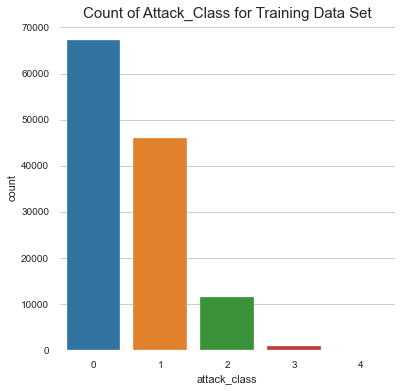

In [27]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class for Training Data Set',fontsize=15)
sns.countplot("attack_class", data=train_m)
plt.show()

In [28]:
# dropping attack variable as attack_class is imputed

train_m_cat = train_m.select_dtypes(np.object).drop('attack',axis=1)
train_m_cat

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [29]:
# dropping attack variable as attack_class is imputed

train_m_num = train_m.drop(train_m_cat,axis=1).drop('attack',axis=1)
train_m_num

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,1
125969,8,105,145,0,0,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,0
125971,0,0,0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,1


In [30]:
# Creating Data audit Report for numerical variable

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_m_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [31]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])
cat_summary=train_m_cat.apply(lambda x: categorical_var_summary(x)).T
cat_summary

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49


### Creating Dummy Variables

In [32]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [33]:
#for c_feature in categorical_features
for c_feature in train_m_cat.columns:
    train_m_cat[c_feature] = train_m_cat[c_feature].astype('category')
    train_m_cat = create_dummies(train_m_cat , c_feature )

In [34]:
train_m_cat

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
train_m_cat.dtypes

protocol_type_tcp    uint8
protocol_type_udp    uint8
service_X11          uint8
service_Z39_50       uint8
service_aol          uint8
                     ...  
flag_S1              uint8
flag_S2              uint8
flag_S3              uint8
flag_SF              uint8
flag_SH              uint8
Length: 81, dtype: object

## Creating new data set with cleaned data

In [36]:
train_m_new = pd.concat([train_m_num,train_m_cat],axis=1)
train_m_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
for x in train_m_new.columns:
    print(x)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
last_flag
attack_class
protocol_type_tcp
protocol_type_udp
service_X11
service_Z39_50
service_aol
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_harvest
service_hostnames
service_http
service_http_2784


In [38]:
### Correlation Matrix

# correlation matrix (ranges from 1 to -1)
corr = train_m_new.corr()
abs(corr['attack_class'].sort_values(ascending=False))

attack_class                1.000000
service_private             0.398863
dst_host_diff_srv_rate      0.391328
count                       0.388358
dst_host_srv_serror_rate    0.384796
                              ...   
flag_SF                     0.548643
last_flag                   0.557251
logged_in                   0.576031
dst_host_srv_count          0.624241
num_outbound_cmds                NaN
Name: attack_class, Length: 121, dtype: float64

### Feature importance from the Random Forest Model

In [39]:
#Splitting the data

feature_columns = train_m_new.columns.difference(['attack_class'])

feature_columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       ...
       'service_vmnet', 'service_whois', 'src_bytes', 'srv_count',
       'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object', length=120)

In [40]:
from sklearn.model_selection import train_test_split


train_m_X, test_m_X, train_m_y, test_m_y = train_test_split(train_m_new[feature_columns],
                                                  train_m_new['attack_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 )
radm_clf.fit( train_m_X, train_m_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [43]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_m_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_m_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

   rank                      feature  importance
0     1                    src_bytes    0.120514
1     2                diff_srv_rate    0.076797
2     3                        count    0.049651
3     4                      flag_SF    0.049518
4     5     dst_host_srv_serror_rate    0.048756
5     6         dst_host_serror_rate    0.048497
6     7                same_srv_rate    0.045280
7     8       dst_host_diff_srv_rate    0.042402
8     9                    last_flag    0.040810
9    10                    logged_in    0.040697
10   11           dst_host_srv_count    0.040479
11   12                    dst_bytes    0.040078
12   13                  serror_rate    0.037666
13   14       dst_host_same_srv_rate    0.035742
14   15  dst_host_same_src_port_rate    0.030088
15   16                    srv_count    0.024697
16   17  dst_host_srv_diff_host_rate    0.023091
17   18                      flag_S0    0.020328
18   19               dst_host_count    0.016686
19   20             

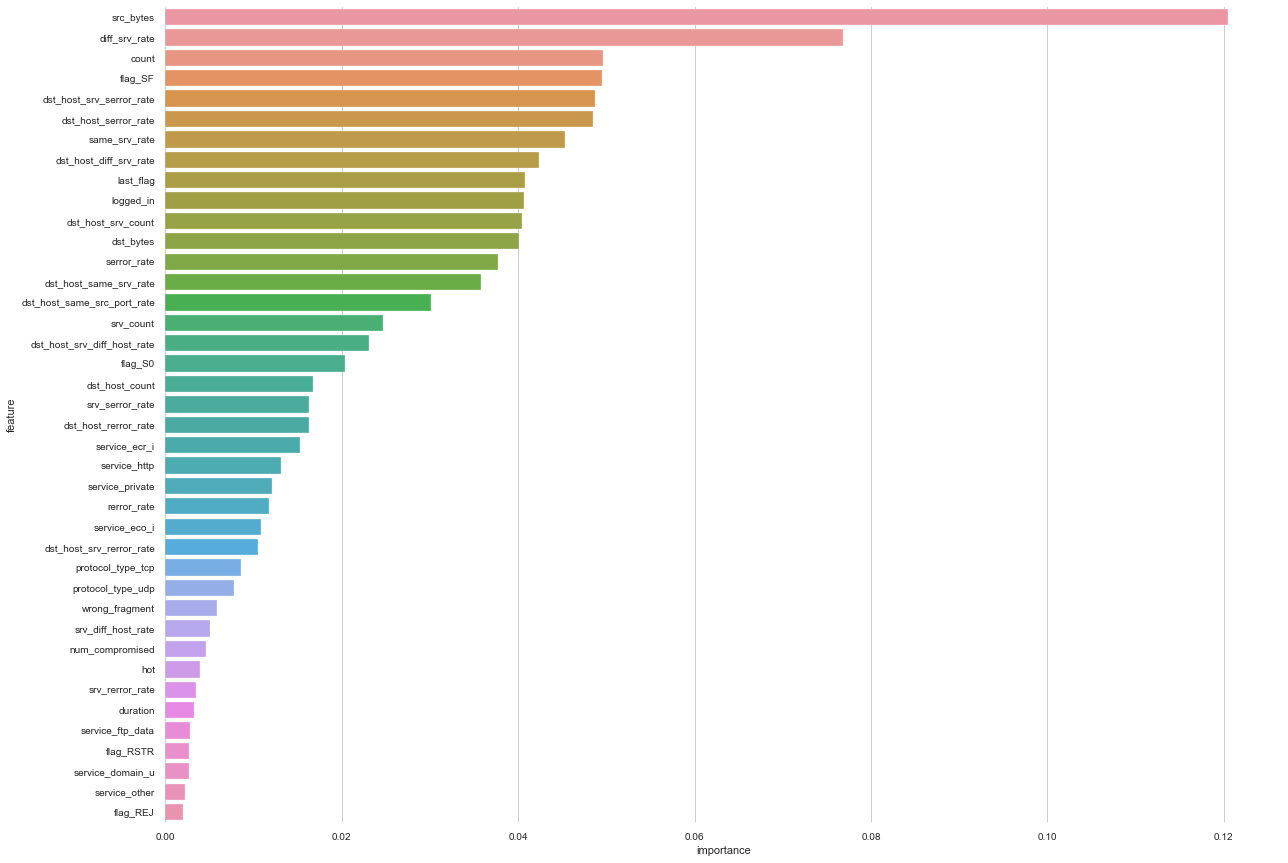

In [44]:
print(feature_rank.iloc[0:40])
plt.figure(figsize=(20,15))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank.iloc[0:40])
plt.show()

In [45]:
# Retaining 30 columns according to the importance

feature_rf = list(feature_rank.iloc[0:40]['feature'].values)
print(feature_rf)
print('\nNo. of features:',len(feature_rf))

['src_bytes', 'diff_srv_rate', 'count', 'flag_SF', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'same_srv_rate', 'dst_host_diff_srv_rate', 'last_flag', 'logged_in', 'dst_host_srv_count', 'dst_bytes', 'serror_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'srv_count', 'dst_host_srv_diff_host_rate', 'flag_S0', 'dst_host_count', 'srv_serror_rate', 'dst_host_rerror_rate', 'service_ecr_i', 'service_http', 'service_private', 'rerror_rate', 'service_eco_i', 'dst_host_srv_rerror_rate', 'protocol_type_tcp', 'protocol_type_udp', 'wrong_fragment', 'srv_diff_host_rate', 'num_compromised', 'hot', 'srv_rerror_rate', 'duration', 'service_ftp_data', 'flag_RSTR', 'service_domain_u', 'service_other', 'flag_REJ']

No. of features: 40


## Check Multicollinearity among independent variables. (VIF)

In [46]:
train_m_new[feature_rf]

,src_bytes,diff_srv_rate,count,flag_SF,dst_host_srv_serror_rate,dst_host_serror_rate,same_srv_rate,dst_host_diff_srv_rate,last_flag,logged_in,...,srv_diff_host_rate,num_compromised,hot,srv_rerror_rate,duration,service_ftp_data,flag_RSTR,service_domain_u,service_other,flag_REJ
0,491,0.00,2,1,0.00,0.00,1.00,0.03,20,0,...,0.00,0,0,0.0,0,1,0,0,0,0
1,146,0.15,13,1,0.00,0.00,0.08,0.60,15,0,...,0.00,0,0,0.0,0,0,0,0,1,0
2,0,0.07,123,0,1.00,1.00,0.05,0.05,19,0,...,0.00,0,0,0.0,0,0,0,0,0,0
3,232,0.00,5,1,0.01,0.03,1.00,0.00,21,1,...,0.00,0,0,0.0,0,0,0,0,0,0
4,199,0.00,30,1,0.00,0.00,1.00,0.00,21,1,...,0.09,0,0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0.06,184,0,1.00,1.00,0.14,0.06,20,0,...,0.00,0,0,0.0,0,0,0,0,0,0
125969,105,0.00,2,1,0.00,0.00,1.00,0.01,21,0,...,0.00,0,0,0.0,8,0,0,0,0,0
125970,2231,0.00,1,1,0.00,0.72,1.00,0.06,18,1,...,0.00,0,0,0.0,0,0,0,0,0,0
125971,0,0.05,144,0,1.00,1.00,0.06,0.05,20,0,...,0.00,0,0,0.0,0,0,0,0,0,0


In [47]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [48]:
#gather features from feature_rf
vif1 = pd.DataFrame()
def cal_vif(f,v):
    featuresn = train_m_new[f].columns
    featuresn = '+'.join(featuresn)
    featuresn = 'attack_class~'+featuresn
    y, X = dmatrices(featuresn, train_m_new, return_type='dataframe')
    v = pd.DataFrame()
    v['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    v['features'] = X.columns
    return v.sort_values('VIF Factor',ascending=False)

In [49]:
cal_vif(feature_rf,vif1)

,VIF Factor,features
0,665.237924,Intercept
20,140.314171,srv_serror_rate
13,119.735967,serror_rate
34,78.133212,srv_rerror_rate
4,73.524513,flag_SF
25,68.249710,rerror_rate
5,65.570907,dst_host_srv_serror_rate
18,46.361521,flag_S0
6,45.583521,dst_host_serror_rate
28,40.403854,protocol_type_tcp


In [50]:
# Function for dropping variables

def drop_var(x):
    var = x.sort_values('VIF Factor',ascending=False)[-(x.features=='Intercept')].head(1).features.values[0]
    return var

#### Removing variables one by one till all variables' vif ~ 10 or vif <10

In [51]:
# 1.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: srv_serror_rate


,VIF Factor,features
0,647.340760,Intercept
13,73.216428,serror_rate
4,68.388378,flag_SF
33,68.313634,srv_rerror_rate
24,65.176016,rerror_rate
5,55.268048,dst_host_srv_serror_rate
18,45.653871,flag_S0
6,44.722471,dst_host_serror_rate
27,40.402805,protocol_type_tcp
28,27.544461,protocol_type_udp


In [52]:
# 2.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: serror_rate


,VIF Factor,features
0,500.724328,Intercept
32,67.732478,srv_rerror_rate
23,56.864690,rerror_rate
5,53.780194,dst_host_srv_serror_rate
17,45.621538,flag_S0
6,41.303257,dst_host_serror_rate
26,40.402621,protocol_type_tcp
4,37.695527,flag_SF
27,27.531771,protocol_type_udp
25,21.273330,dst_host_srv_rerror_rate


In [53]:
# 3.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: srv_rerror_rate


,VIF Factor,features
0,487.377317,Intercept
5,52.091495,dst_host_srv_serror_rate
17,43.514896,flag_S0
6,40.611879,dst_host_serror_rate
26,40.369609,protocol_type_tcp
4,34.961682,flag_SF
23,28.673876,rerror_rate
27,27.530630,protocol_type_udp
25,19.130286,dst_host_srv_rerror_rate
13,13.994221,dst_host_same_srv_rate


In [54]:
# 4.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: dst_host_srv_serror_rate


,VIF Factor,features
0,482.687725,Intercept
25,40.312555,protocol_type_tcp
16,39.306945,flag_S0
4,33.747958,flag_SF
22,28.656660,rerror_rate
26,27.520335,protocol_type_udp
5,27.364277,dst_host_serror_rate
24,18.622001,dst_host_srv_rerror_rate
12,13.990424,dst_host_same_srv_rate
6,12.871425,same_srv_rate


In [55]:
# 5.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: protocol_type_tcp


,VIF Factor,features
0,303.341682,Intercept
16,38.856353,flag_S0
4,33.491883,flag_SF
22,28.425992,rerror_rate
5,27.160770,dst_host_serror_rate
24,18.506753,dst_host_srv_rerror_rate
12,13.982077,dst_host_same_srv_rate
6,12.799022,same_srv_rate
9,10.818594,logged_in
18,10.339198,dst_host_rerror_rate


In [56]:
# 6.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: flag_S0


,VIF Factor,features
0,252.172323,Intercept
21,26.015982,rerror_rate
4,24.173197,flag_SF
5,20.993119,dst_host_serror_rate
23,17.743122,dst_host_srv_rerror_rate
12,13.857417,dst_host_same_srv_rate
6,12.407083,same_srv_rate
17,10.314778,dst_host_rerror_rate
9,10.311106,logged_in
10,9.609333,dst_host_srv_count


In [57]:
# 7.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: rerror_rate


,VIF Factor,features
0,230.741557,Intercept
4,20.079424,flag_SF
5,17.152902,dst_host_serror_rate
22,14.394677,dst_host_srv_rerror_rate
12,13.833864,dst_host_same_srv_rate
6,12.362345,same_srv_rate
9,10.272038,logged_in
10,9.609172,dst_host_srv_count
17,9.376751,dst_host_rerror_rate
23,9.274862,protocol_type_udp


In [58]:
# 8.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: flag_SF


,VIF Factor,features
0,205.568810,Intercept
11,13.808950,dst_host_same_srv_rate
21,13.323430,dst_host_srv_rerror_rate
5,12.156902,same_srv_rate
4,10.082580,dst_host_serror_rate
9,9.603179,dst_host_srv_count
16,9.248388,dst_host_rerror_rate
8,8.542811,logged_in
22,8.407090,protocol_type_udp
32,6.220504,flag_REJ


In [59]:
# 9.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: dst_host_same_srv_rate


,VIF Factor,features
0,200.140405,Intercept
20,13.323240,dst_host_srv_rerror_rate
5,11.468724,same_srv_rate
4,10.082054,dst_host_serror_rate
15,9.246368,dst_host_rerror_rate
8,8.406318,logged_in
21,8.364548,protocol_type_udp
31,6.214698,flag_REJ
9,6.061746,dst_host_srv_count
3,5.054280,count


In [60]:
# 10.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: dst_host_srv_rerror_rate


,VIF Factor,features
0,196.925327,Intercept
5,11.441609,same_srv_rate
4,9.380831,dst_host_serror_rate
8,8.161262,logged_in
20,7.985778,protocol_type_udp
15,6.376312,dst_host_rerror_rate
9,6.039964,dst_host_srv_count
3,5.049666,count
28,4.991227,service_domain_u
12,4.891235,srv_count


In [61]:
# 11.

print('Variable to be dropped:',drop_var(cal_vif(feature_rf,vif1)))
feature_rf.remove(drop_var(cal_vif(feature_rf,vif1)))
vif = cal_vif(feature_rf,vif1)
vif

Variable to be dropped: same_srv_rate


,VIF Factor,features
0,150.208808,Intercept
7,8.109527,logged_in
19,7.959053,protocol_type_udp
4,7.914092,dst_host_serror_rate
14,5.811551,dst_host_rerror_rate
8,5.751390,dst_host_srv_count
27,4.893170,service_domain_u
29,4.711680,flag_REJ
16,4.614431,service_http
11,4.257126,srv_count


#### Now all variables vif < 10. So we consider these variables for further calculations

In [62]:
vif.shape

(30, 2)

In [63]:
vif_features = vif[-(vif['features']=='Intercept')].features.values
print('No. of features selected',len(vif_features))
vif_features

No. of features selected 29


array(['logged_in', 'protocol_type_udp', 'dst_host_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_count', 'service_domain_u',
       'flag_REJ', 'service_http', 'srv_count', 'service_eco_i', 'count',
       'service_ecr_i', 'dst_host_same_src_port_rate',
       'dst_host_diff_srv_rate', 'flag_RSTR',
       'dst_host_srv_diff_host_rate', 'service_other', 'dst_host_count',
       'service_private', 'diff_srv_rate', 'srv_diff_host_rate',
       'last_flag', 'duration', 'service_ftp_data', 'wrong_fragment',
       'hot', 'src_bytes', 'num_compromised', 'dst_bytes'], dtype=object)

## Building a Decision Tree Model

In [64]:
train_m_X_new = train_m_X[vif_features]
train_m_X_new

,logged_in,protocol_type_udp,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_count,service_domain_u,flag_REJ,service_http,srv_count,service_eco_i,...,diff_srv_rate,srv_diff_host_rate,last_flag,duration,service_ftp_data,wrong_fragment,hot,src_bytes,num_compromised,dst_bytes
111880,1,0,0.00,0.00,255,0,0,1,16,0,...,0.00,0.25,20,0,0,0,0,210,0,255
48663,0,1,0.00,0.00,254,1,0,0,268,0,...,0.00,0.00,18,0,0,0,0,44,0,79
52751,0,0,0.00,1.00,1,0,1,0,1,0,...,0.06,0.00,18,0,0,0,0,0,0,0
104967,0,0,1.00,0.00,20,0,0,0,20,0,...,0.06,0.00,20,0,0,0,0,0,0,0
22139,0,0,0.00,1.00,1,0,1,0,1,0,...,0.10,0.00,21,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,1,0,0.00,0.00,45,0,0,0,2,0,...,0.00,1.00,21,0,0,0,0,733,0,328
17730,0,0,1.00,0.00,4,0,0,0,4,0,...,0.06,0.00,18,0,0,0,0,0,0,0
28030,0,0,0.00,0.15,1,0,0,0,1,0,...,0.00,0.00,14,0,0,0,0,0,0,0
15725,1,0,0.00,0.00,255,0,0,1,11,0,...,0.00,0.00,21,0,0,0,0,222,0,267


In [65]:
test_m_X_new = test_m_X[vif_features]
test_m_X_new

,logged_in,protocol_type_udp,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_count,service_domain_u,flag_REJ,service_http,srv_count,service_eco_i,...,diff_srv_rate,srv_diff_host_rate,last_flag,duration,service_ftp_data,wrong_fragment,hot,src_bytes,num_compromised,dst_bytes
85247,1,0,0.00,0.0,255,0,0,1,13,0,...,0.00,0.0,21,0,0,0,0,243,0,929
121265,0,0,1.00,0.0,10,0,0,0,10,0,...,0.05,0.0,20,0,0,0,0,0,0,0
99209,0,0,0.00,0.0,255,0,0,0,36,0,...,0.00,0.0,18,0,0,0,0,520,0,0
8177,0,0,1.00,0.0,25,0,0,0,25,0,...,0.06,0.0,18,0,0,0,0,0,0,0
90461,0,0,0.00,1.0,255,0,1,1,2,0,...,0.00,1.0,21,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115302,0,0,1.00,0.0,16,0,0,0,18,0,...,0.06,0.0,21,0,0,0,0,0,0,0
11150,0,0,1.00,0.0,1,0,0,0,12,0,...,0.07,0.0,18,0,0,0,0,0,0,0
93904,0,0,1.00,0.0,12,0,0,0,12,0,...,0.06,0.0,20,0,0,0,0,0,0,0
116604,1,0,0.00,0.0,255,0,0,1,10,0,...,0.00,0.0,21,0,0,0,0,320,0,280


In [66]:
import sklearn.tree as dt
import sklearn.ensemble as en

In [67]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [68]:
DecisionTreeClassifier?

In [69]:
clf_tree = DecisionTreeClassifier( max_depth = 5 ,random_state=123)
clf_tree.fit( train_m_X_new, train_m_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [70]:
pd.DataFrame(clf_tree.predict_proba(train_m_X_new))

,0,1,2,3,4
0,0.999939,0.000000,0.000020,0.000041,0.0
1,0.999939,0.000000,0.000020,0.000041,0.0
2,0.000556,0.997932,0.001512,0.000000,0.0
3,0.000556,0.997932,0.001512,0.000000,0.0
4,0.000556,0.997932,0.001512,0.000000,0.0
...,...,...,...,...,...
100773,0.999939,0.000000,0.000020,0.000041,0.0
100774,0.000556,0.997932,0.001512,0.000000,0.0
100775,0.088556,0.023161,0.888283,0.000000,0.0
100776,0.999939,0.000000,0.000020,0.000041,0.0


In [71]:
tree_train_pred = pd.DataFrame( { 'actual':  train_m_y,
                            'predicted': clf_tree.predict( train_m_X_new ) } )
tree_train_pred

,actual,predicted
111880,0,0
48663,0,0
52751,1,1
104967,1,1
22139,1,1
...,...,...
61404,0,0
17730,1,1
28030,2,2
15725,0,0


In [72]:
print('Train accuracy before tuning hyperparameters :',
      metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

Train accuracy before tuning hyperparameters : 0.9873186608188295


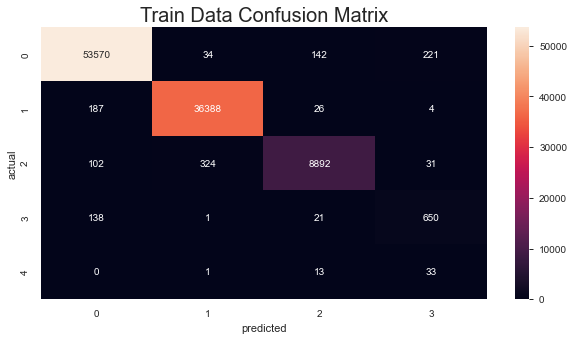

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(tree_train_pred.actual, tree_train_pred.predicted), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix' , fontsize=20)
plt.show()

In [74]:
# For Testing

tree_test_pred = pd.DataFrame( { 'actual':  test_m_y,
                            'predicted': clf_tree.predict( test_m_X_new ) } )
tree_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
115302,1,1
11150,1,1
93904,1,1
116604,0,0


In [75]:
print('Test accuracy before tuning hyperparameters :',
        metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Test accuracy before tuning hyperparameters : 0.9872593768604881


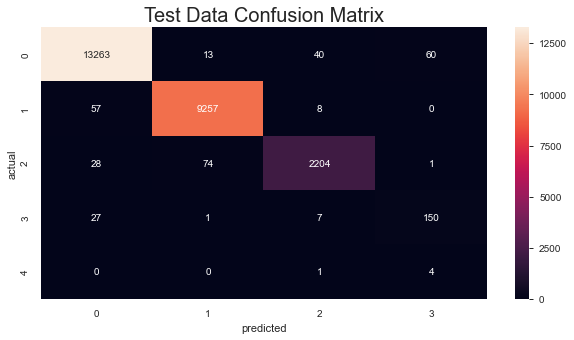

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(tree_test_pred.actual, tree_test_pred.predicted ), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix' , fontsize=20)
plt.show()

#### Fine Tuning the parameters

In [77]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(10,29)}

In [78]:
tree = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, cv = 10)
tree.fit( train_m_X_new, train_m_y )

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
tree.best_params_

{'max_depth': 11, 'max_features': 21}

In [80]:
tree.best_score_

0.997807061064915

### Building Final Decision Tree Model

In [1]:
train_m_X_new.head()

NameError: name 'train_m_X_new' is not defined

In [82]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=21, random_state=123 )
clf_tree.fit( train_m_X_new, train_m_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=21, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [83]:
tree_test_pred = pd.DataFrame( { 'actual':  test_m_y,
                            'predicted': clf_tree.predict( test_m_X_new ) } )
tree_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
115302,1,1
11150,1,1
93904,1,1
116604,0,0


In [84]:
tree_test_pred.sample( n = 10 )

,actual,predicted
3167,1,1
106685,1,1
53453,0,0
39234,0,0
38577,0,0
89704,1,1
100639,0,0
52632,3,3
78049,1,1
98667,1,1


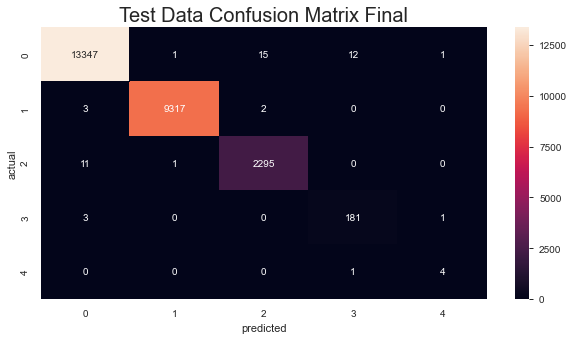

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(tree_test_pred.actual, tree_test_pred.predicted ), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix Final' , fontsize=20)
plt.show()

In [86]:
print('Test data accuracy after tuning hyperparameters :',
        metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Test data accuracy after tuning hyperparameters : 0.9979757888469935


In [87]:
print(metrics.classification_report(tree_test_pred.actual, tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13376
           1       1.00      1.00      1.00      9322
           2       0.99      0.99      0.99      2307
           3       0.93      0.98      0.96       185
           4       0.67      0.80      0.73         5

   micro avg       1.00      1.00      1.00     25195
   macro avg       0.92      0.95      0.93     25195
weighted avg       1.00      1.00      1.00     25195



## Building a Random Forest Model

In [134]:
radm_clf_new = RandomForestClassifier(oob_score=True,n_estimators=100,random_state=123 )
radm_clf_new.fit( train_m_X_new, train_m_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [135]:
radm_test_pred = pd.DataFrame( { 'actual':  test_m_y,
                            'predicted': radm_clf_new.predict( test_m_X_new ) } )
radm_test_pred

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
115302,1,1
11150,1,1
93904,1,1
116604,0,0


In [136]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9994840246080572

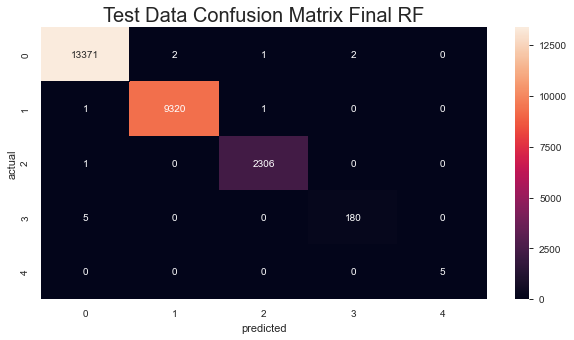

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(radm_test_pred.actual, radm_test_pred.predicted ), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix Final RF' , fontsize=20)
plt.show()

In [138]:
print(metrics.classification_report(radm_test_pred.actual, radm_test_pred.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13376
           1       1.00      1.00      1.00      9322
           2       1.00      1.00      1.00      2307
           3       0.99      0.97      0.98       185
           4       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      0.99      1.00     25195
weighted avg       1.00      1.00      1.00     25195



#### Fine Tuning the parameters

In [149]:
RandomForestClassifier?

In [164]:
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7,8,9,10]}

In [165]:
from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_m_X_new, train_m_y) 

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 31.3min finished


In [166]:
gscv_results.best_params_

{'max_features': 10, 'n_estimators': 100}

In [167]:
gscv_rf.best_score_

0.9995237055706603

### Building Final Random Forest Model

In [185]:
radm_clf_new1 = RandomForestClassifier(random_state=123,oob_score=True,n_estimators=100, max_features=10, n_jobs=-1)
radm_clf_new1.fit(train_m_X_new, train_m_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [186]:
radm_test_pred1 = pd.DataFrame( { 'actual':  test_m_y,
                            'predicted': radm_clf_new1.predict( test_m_X_new ) } )
radm_test_pred1

,actual,predicted
85247,0,0
121265,1,1
99209,1,1
8177,1,1
90461,0,0
...,...,...
115302,1,1
11150,1,1
93904,1,1
116604,0,0


In [187]:
print(metrics.accuracy_score( radm_test_pred1.actual, radm_test_pred1.predicted ))

0.9994840246080572


In [194]:
print(radm_clf_new1.feature_importances_)
print(np.argsort(radm_clf_new1.feature_importances_))

[0.00812138 0.00796121 0.062347   0.00945908 0.02495592 0.00297613
 0.00133456 0.01304002 0.01775146 0.00650512 0.09329778 0.02555701
 0.05870891 0.04596129 0.00125835 0.00877178 0.00102893 0.00662284
 0.00692363 0.13913543 0.00053766 0.05629823 0.00175965 0.00440286
 0.00558817 0.00396157 0.26576278 0.00430869 0.11566255]
[20 16 14  6 22  5 25 27 23 24  9 17 18  1  0 15  3  7  8  4 11 13 21 12
  2 10 28 19 26]


In [197]:
indices = np.argsort(radm_clf_new1.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_m_X_new.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_m_X_new.columns[indices[f]],
                         radm_clf_new1.feature_importances_[indices[f]]]

   rank                      feature  importance
0     1                    src_bytes    0.265763
1     2                diff_srv_rate    0.139135
2     3                    dst_bytes    0.115663
3     4                        count    0.093298
4     5         dst_host_serror_rate    0.062347
5     6  dst_host_same_src_port_rate    0.058709
6     7                    last_flag    0.056298
7     8       dst_host_diff_srv_rate    0.045961
8     9                service_ecr_i    0.025557
9    10           dst_host_srv_count    0.024956
10   11                    srv_count    0.017751
11   12                 service_http    0.013040
12   13         dst_host_rerror_rate    0.009459
13   14  dst_host_srv_diff_host_rate    0.008772
14   15                    logged_in    0.008121
15   16            protocol_type_udp    0.007961
16   17              service_private    0.006924
17   18               dst_host_count    0.006623
18   19                service_eco_i    0.006505
19   20             

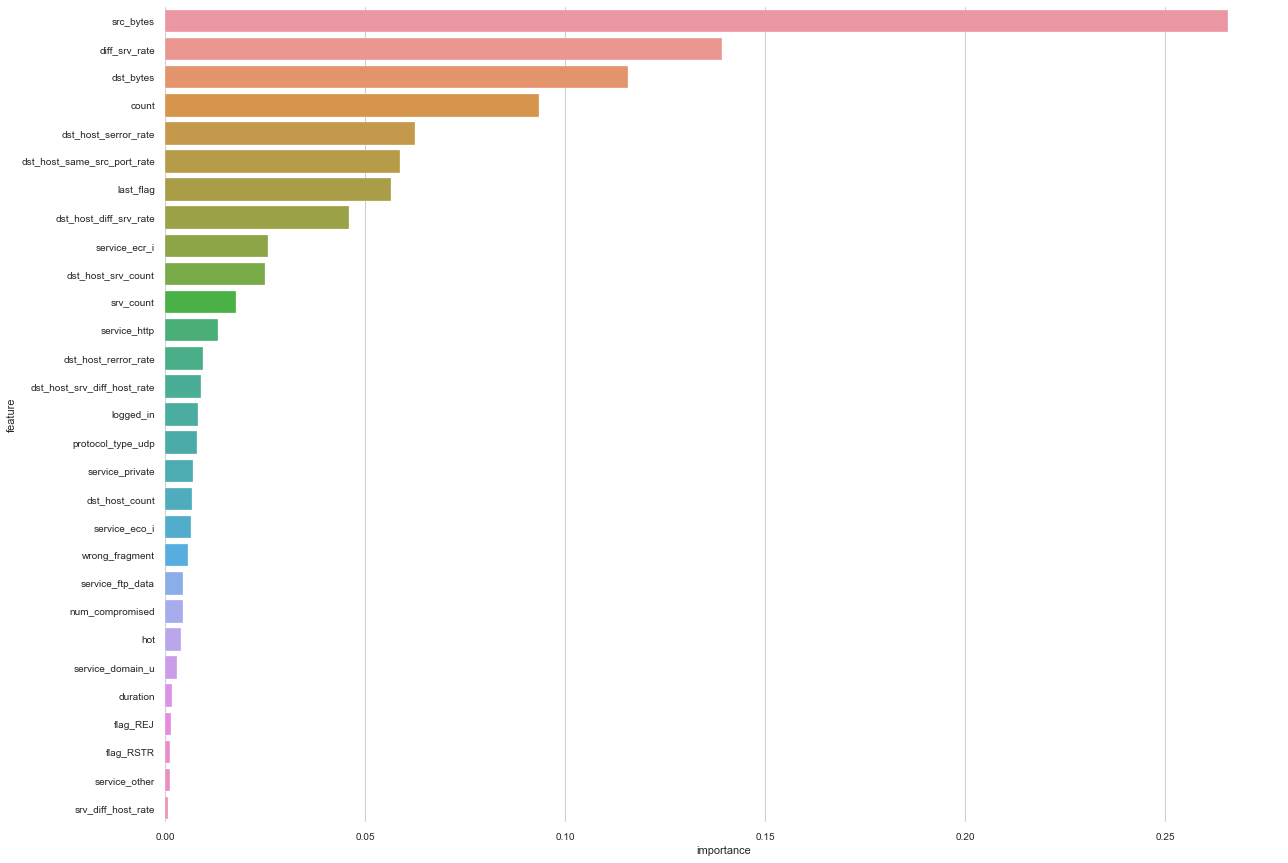

In [198]:
print(feature_rank)
plt.figure(figsize=(20,15))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.show()

Note: As per the model, the most important features which detect anamolies and attacks in the network are:-

0                       src_bytes
1                   diff_srv_rate
2                       dst_bytes
3                           count
4            dst_host_serror_rate
5     dst_host_same_src_port_rate
6                       last_flag
7          dst_host_diff_srv_rate
8                   service_ecr_i
9              dst_host_srv_count
10                      srv_count
11                   service_http
12           dst_host_rerror_rate
13    dst_host_srv_diff_host_rate
14                      logged_in
15              protocol_type_udp
16                service_private
17                 dst_host_count
18                  service_eco_i
19                 wrong_fragment
20               service_ftp_data
21                num_compromised
22                            hot
23               service_domain_u
24                       duration
25                       flag_REJ
26                      flag_RSTR
27                  service_other
28             srv_diff_host_rate


### Here, we have tested the data from the train data set given to us by splitting it into 80/20 
### Now we will test our Model for the test data given for the Case Study. 

**********************

## For Testing Data Set
#### Performing same steps for data preparation as done in train data

In [88]:
test_m = test.copy()
test_m

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In attack_class 
 1. `normal : 0`
 2. `DOS : 1`
 3. `PROBE : 2` 
 4. `R2L : 3` 
 5. `U2R : 4`

In [89]:
test_m['attack_class']=np.where(test_m.attack=='normal',0,
                               np.where((test_m.attack=='back') | (test_m.attack=='land') | (test_m.attack=='neptune') | (test_m.attack=='pod') | (test_m.attack=='smurf') | (test_m.attack=='teardrop') | (test_m.attack=='apache2') | (test_m.attack=='udpstorm') | (test_m.attack=='processtable') | (test_m.attack=='worm'),1,
                               np.where((test_m.attack=='satan') | (test_m.attack=='ipsweep') | (test_m.attack=='nmap') | (test_m.attack=='portsweep') | (test_m.attack=='mscan') | (test_m.attack=='saint'),2,
                               np.where((test_m.attack=='guess_passwd') | (test_m.attack=='ftp_write') | (test_m.attack=='imap') | (test_m.attack=='phf') | (test_m.attack=='multihop') | (test_m.attack=='warezmaster') | (test_m.attack=='warezclient') | (test_m.attack=='spy') | (test_m.attack=='xlock') | (test_m.attack=='xsnoop') | (test_m.attack=='snmpguess') | (test_m.attack=='snmpgetattack') | (test_m.attack=='httptunnel') | (test_m.attack=='sendmail') | (test_m.attack=='named'),3,4))))

In [90]:
test_m.loc[:,['attack','attack_class']]

,attack,attack_class
0,neptune,1
1,neptune,1
2,normal,0
3,saint,2
4,mscan,2
...,...,...
22539,normal,0
22540,normal,0
22541,back,1
22542,normal,0


In [91]:
test_m['attack_class'].value_counts()

0    9711
1    7167
3    2885
2    2421
4     360
Name: attack_class, dtype: int64

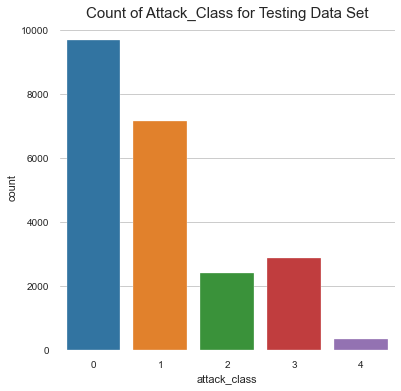

In [92]:
plt.figure(figsize=(6,6))
plt.title('Count of Attack_Class for Testing Data Set',fontsize=15)
sns.countplot("attack_class", data=test_m)
plt.show()

In [93]:
# dropping attack variable as attack_class is imputed

test_m_cat = test_m.select_dtypes(np.object).drop('attack',axis=1)
test_m_cat

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
...,...,...,...
22539,tcp,smtp,SF
22540,tcp,http,SF
22541,tcp,http,SF
22542,udp,domain_u,SF


In [94]:
# dropping attack variable as attack_class is imputed

test_m_num = test_m.drop(test_m_cat,axis=1).drop('attack',axis=1)
test_m_num

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1
2,2,12983,0,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,0
3,0,20,0,0,0,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,2
4,1,0,15,0,0,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22540,0,317,938,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15,1
22542,0,42,42,0,0,0,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21,0


### Creating Dummy Variables

In [95]:
#for c_feature in categorical_features
for c_feature in test_m_cat.columns:
    test_m_cat[c_feature] = test_m_cat[c_feature].astype('category')
    test_m_cat = create_dummies(test_m_cat , c_feature )

In [96]:
test_m_cat

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22541,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22542,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Creating new data set with cleaned data

In [97]:
test_m_new = pd.concat([test_m_num,test_m_cat],axis=1)
test_m_new

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
for x in test_m_new.columns:
    print(x)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
last_flag
attack_class
protocol_type_tcp
protocol_type_udp
service_X11
service_Z39_50
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_hostnames
service_http
service_http_443
service_imap4
service_iso_tsa

### Model Validation Using Decision Tree

In [99]:
len(train_m_X_new.columns)

29

In [100]:
test_m_new_X = test_m_new[train_m_X_new.columns]
test_m_new_X

,logged_in,protocol_type_udp,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_count,service_domain_u,flag_REJ,service_http,srv_count,service_eco_i,...,diff_srv_rate,srv_diff_host_rate,last_flag,duration,service_ftp_data,wrong_fragment,hot,src_bytes,num_compromised,dst_bytes
0,0,0,0.00,1.00,10,0,1,0,10,0,...,0.06,0.00,21,0,0,0,0,0,0,0
1,0,0,0.00,1.00,1,0,1,0,1,0,...,0.06,0.00,21,0,0,0,0,0,0,0
2,0,0,0.00,0.00,86,0,0,0,1,0,...,0.00,0.00,21,2,1,0,0,12983,0,0
3,0,0,0.00,0.00,57,0,0,0,65,1,...,0.00,1.00,15,0,0,0,0,20,0,0
4,0,0,0.00,0.83,86,0,0,0,8,0,...,0.00,0.75,11,1,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,0,0.01,0.00,141,0,0,0,1,0,...,0.00,0.00,21,0,0,0,0,794,0,333
22540,1,0,0.01,0.00,255,0,0,1,11,0,...,0.00,0.18,21,0,0,0,0,317,0,938
22541,1,0,0.00,0.07,255,0,0,1,10,0,...,0.00,0.20,15,0,0,0,2,54540,1,8314
22542,0,1,0.00,0.00,252,1,0,0,6,0,...,0.00,0.33,21,0,0,0,0,42,0,42


In [101]:
test_m_new_y = test_m_new['attack_class']
test_m_new_y

0        1
1        1
2        0
3        2
4        2
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: attack_class, Length: 22544, dtype: int32

In [102]:
tree_test_pred_new = pd.DataFrame( { 'actual':  test_m_new_y,
                            'predicted': clf_tree.predict( test_m_new_X ) } )
tree_test_pred_new

,actual,predicted
0,1,1
1,1,1
2,0,0
3,2,2
4,2,0
...,...,...
22539,0,0
22540,0,0
22541,1,1
22542,0,0


In [103]:
tree_test_pred_new.sample( n = 10 )

,actual,predicted
7063,2,2
14999,2,2
21280,3,0
8989,3,0
6534,0,0
16361,0,0
8676,1,1
11050,1,1
14547,0,1
18238,0,0


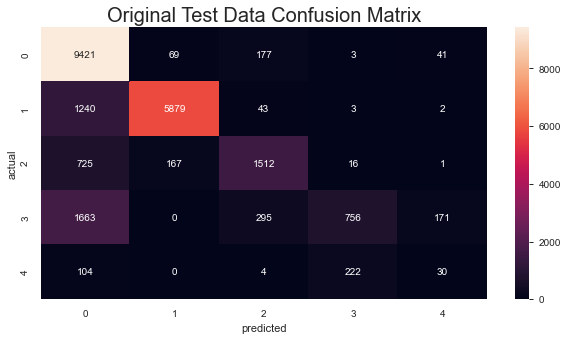

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(tree_test_pred_new.actual, tree_test_pred_new.predicted ), annot=True, fmt='.0f')
plt.title('Original Test Data Confusion Matrix' , fontsize=20)
plt.show()

In [202]:
print('Original Test data accuracy using Decision tree :',
        metrics.accuracy_score(tree_test_pred_new.actual, tree_test_pred_new.predicted ))

Original Test data accuracy using Decision tree : 0.7806068133427964


In [106]:
print(metrics.classification_report(tree_test_pred_new.actual, tree_test_pred_new.predicted))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82      9711
           1       0.96      0.82      0.89      7167
           2       0.74      0.62      0.68      2421
           3       0.76      0.26      0.39      2885
           4       0.12      0.08      0.10       360

   micro avg       0.78      0.78      0.78     22544
   macro avg       0.66      0.55      0.58     22544
weighted avg       0.79      0.78      0.76     22544



### Model Validation Using Random Forest

In [188]:
radm_test_pred_new = pd.DataFrame( { 'actual':  test_m_new_y,
                            'predicted': radm_clf_new1.predict(test_m_new_X) } )
radm_test_pred_new.sample(10)

,actual,predicted
17845,2,0
18019,1,1
2359,3,3
16509,0,0
19966,1,1
748,3,0
380,0,0
15847,3,2
22305,1,1
1687,1,1


In [201]:
print('Random Forest Test Accuracy :',metrics.accuracy_score( radm_test_pred_new.actual, radm_test_pred_new.predicted ))

Random Forest Test Accuracy : 0.7635734563520227


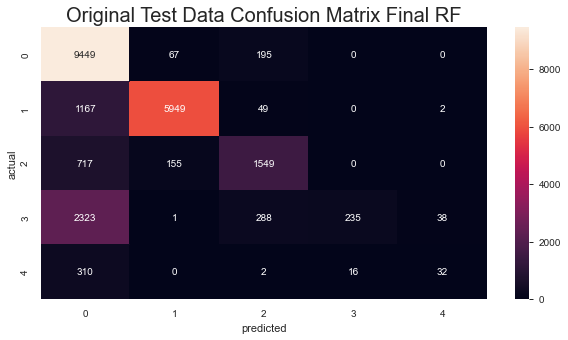

In [192]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(radm_test_pred_new.actual, radm_test_pred_new.predicted ), annot=True, fmt='.0f')
plt.title('Original Test Data Confusion Matrix Final RF' , fontsize=20)
plt.show()

In [200]:
print(metrics.classification_report(radm_test_pred_new.actual, radm_test_pred_new.predicted))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.96      0.83      0.89      7167
           2       0.74      0.64      0.69      2421
           3       0.94      0.08      0.15      2885
           4       0.44      0.09      0.15       360

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.75      0.52      0.54     22544
weighted avg       0.80      0.76      0.72     22544



### Decision Tree Model is giving us 0.78060 Acuuracy for Test Data Set.
### Random Forest is giving us 0.76357 Accuracy for Test Data Set.

******************************